# Evaluation of data collected with SRWA and coloring instances

We tested SRWA with 32 coloring instances with 50 vertices.

The concrete instances can be seen below.

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Preliminaries

In [2]:
#
# Load all necessary modules
#

# Module for "Unix style pathname pattern expansion" 
# and "Miscellaneous operating system interfaces"
import glob
import os

# Modules for data analysis, plotting, etc.
import pandas as pd
import numpy as np
from scipy.stats import probplot
from matplotlib import pyplot as plt
from scipy.stats import lognorm
from scipy import stats
import seaborn as sns

# Load our own modules for analysis of ecdfs, survival functions, 
# confidence intervals, etc. and the respective plotting. 
# The corresponding files can be found in ./evaluation/jupyter.
from empirical import *
from plots import *

In [7]:
# Specify the base path of this experiment series.
# The base path is refined by folders incidating the number of variables.
# For SRWA + hidden instances, we used instances with n \in {50, 100} variables.
base_path = '../../experiments/csvs_coloring'
filter = 'n50'

In [8]:
# List all instances under consideration.
instance_path = os.path.join(base_path, filter)
instances = glob.glob(instance_path + '/*.csv')
instances

['../../experiments/csvs_coloring/n50/three_color_gnp_50vertices_p0.092_seed50_cnfgen.csv',
 '../../experiments/csvs_coloring/n50/three_color_gnp_50vertices_p0.092_seed23_cnfgen.csv',
 '../../experiments/csvs_coloring/n50/three_color_gnp_50vertices_p0.092_seed69_cnfgen.csv',
 '../../experiments/csvs_coloring/n50/three_color_gnp_50vertices_p0.092_seed5_cnfgen.csv',
 '../../experiments/csvs_coloring/n50/three_color_gnp_50vertices_p0.092_seed89_cnfgen.csv',
 '../../experiments/csvs_coloring/n50/three_color_gnp_50vertices_p0.092_seed17_cnfgen.csv',
 '../../experiments/csvs_coloring/n50/three_color_gnp_50vertices_p0.092_seed65_cnfgen.csv',
 '../../experiments/csvs_coloring/n50/three_color_gnp_50vertices_p0.092_seed34_cnfgen.csv',
 '../../experiments/csvs_coloring/n50/three_color_gnp_50vertices_p0.092_seed11_cnfgen.csv',
 '../../experiments/csvs_coloring/n50/three_color_gnp_50vertices_p0.092_seed70_cnfgen.csv',
 '../../experiments/csvs_coloring/n50/three_color_gnp_50vertices_p0.092_seed61_cn

## Visual inspection

In this section, we are going to inspect the data in a visual manner.

A detailed description can be found in the paper. For easier reference, we next provide a short guide.


### Log-histrogram; log-plot ecdf vs. cdf; ecdf vs. cdf; log-plot e-survival vs. survial

First row of plot:

* Histogram of the logarithmically scaled data. If a lognormal distribution is a suitable fit, this histogram should resemble the one of a normal distribution.

Bottom row of plots:

* **Left plot:** The left tail, i. e., the probabilities for very small values, can be checked visually by plotting the ecdf and fitted cdf with both axes logarithmically scaled. Thereby, the probabilities for extreme events (in this case, especially easy instances) can be measured accurately. The $x$-axis in such graphs corresponds to the time (in flips) until a solution is found, and the $y$-axis corresponds to the probability that a solution is found until that time. In red we depict the empirically collected data; blue is the fitted distribution.

* **Middle plot:** Plot of the ecdf and the fitted cdf on the same graph.

* **Right plot:** Lastly, the probabilities for particularly hard instances should also be checked. Any mistakes in this area could lead to underestimating the likelihood of encountering an exceptionally hard instance. For analyses of this type, the survival function $S$ is a useful tool; if $F$ is the cdf, $S(x) := 1 − F (x)$. Therefore, the survival function’s value $S(x)$ represents the probability that an instance is (on average) harder than $x$ in our case. If we plot the empirical survival function ($1 − \hat{F}_n (x)$) and the fitted survival function together on a graph with logarithmically scaled axes, we can easily detect errors in the right tail.

*******************************************************************************************
0 : ../../experiments/csvs_coloring/n50/three_color_gnp_50vertices_p0.092_seed50_cnfgen.csv
*******************************************************************************************
lognormal parameters: sigma 0.12193576302651923, mu 14.281179529917386, location 5.672702748673812e-06


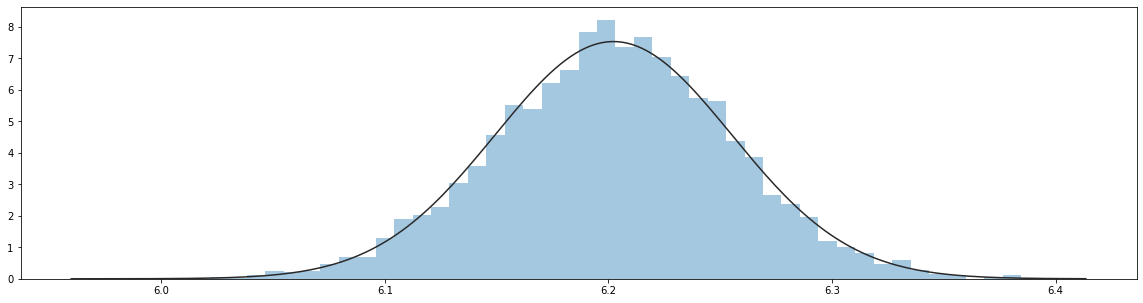

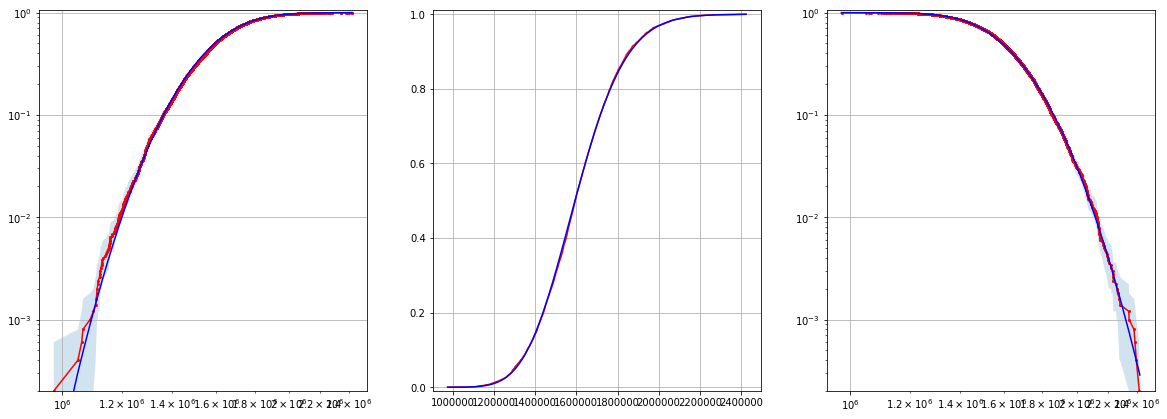



*******************************************************************************************
1 : ../../experiments/csvs_coloring/n50/three_color_gnp_50vertices_p0.092_seed23_cnfgen.csv
*******************************************************************************************
lognormal parameters: sigma 0.1358664261435804, mu 15.007803584079838, location 5.182776305206838e-06


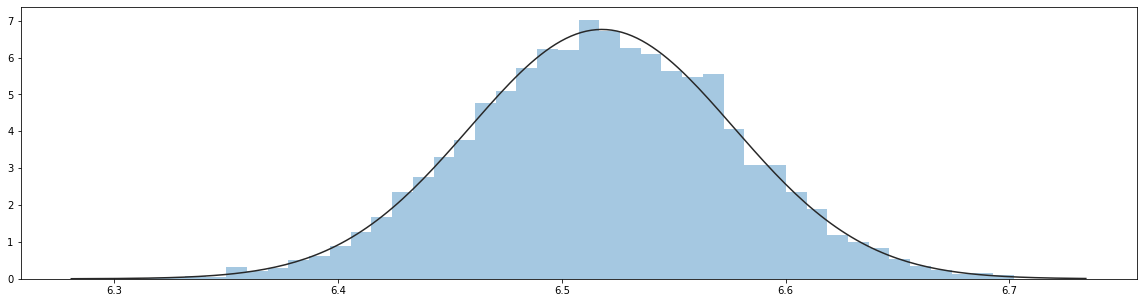

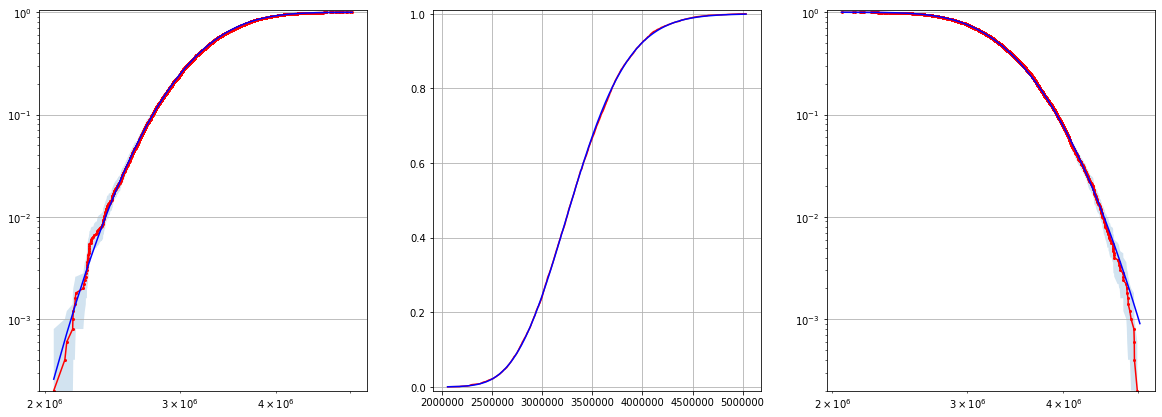



*******************************************************************************************
2 : ../../experiments/csvs_coloring/n50/three_color_gnp_50vertices_p0.092_seed69_cnfgen.csv
*******************************************************************************************
lognormal parameters: sigma 0.14289733833624169, mu 16.357226290781394, location 0.00038795102939401016


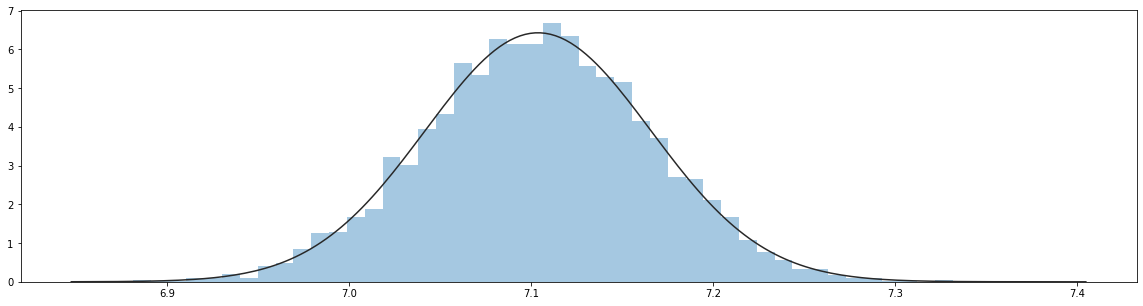

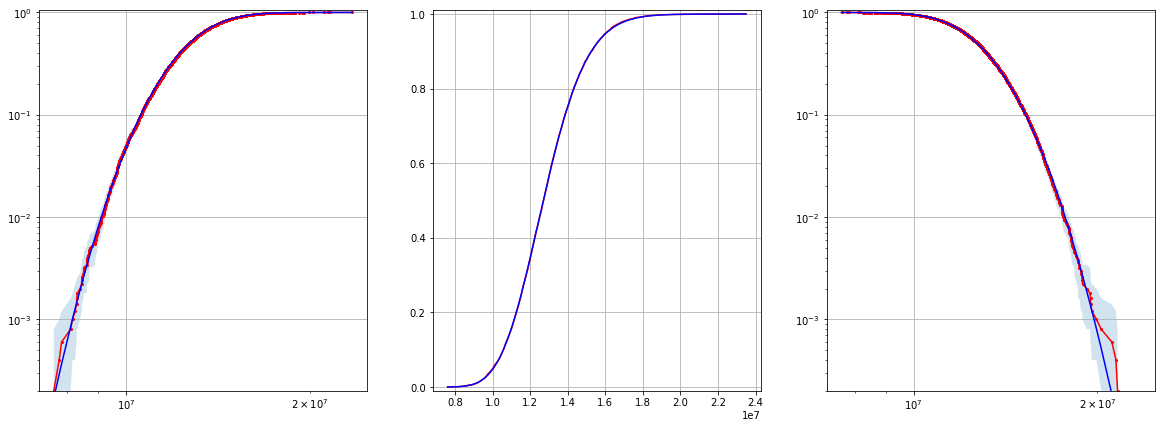



******************************************************************************************
3 : ../../experiments/csvs_coloring/n50/three_color_gnp_50vertices_p0.092_seed5_cnfgen.csv
******************************************************************************************
lognormal parameters: sigma 0.1561608291741779, mu 16.436292373177682, location 693873.6321503492


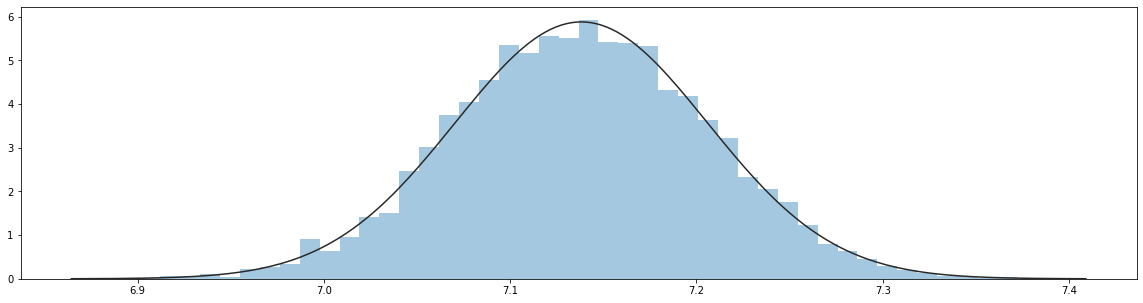

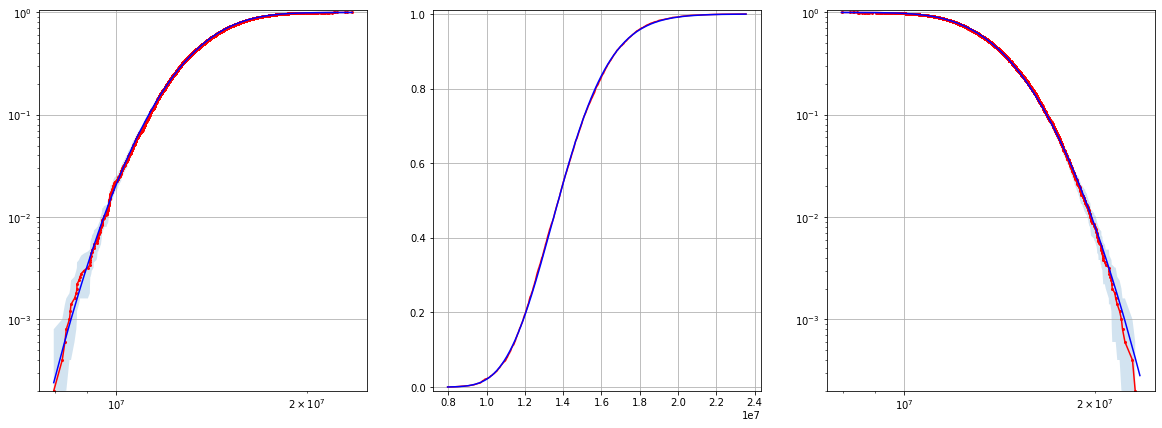



*******************************************************************************************
4 : ../../experiments/csvs_coloring/n50/three_color_gnp_50vertices_p0.092_seed89_cnfgen.csv
*******************************************************************************************
lognormal parameters: sigma 0.14752788250361512, mu 12.891985275340991, location 49690.212335546705


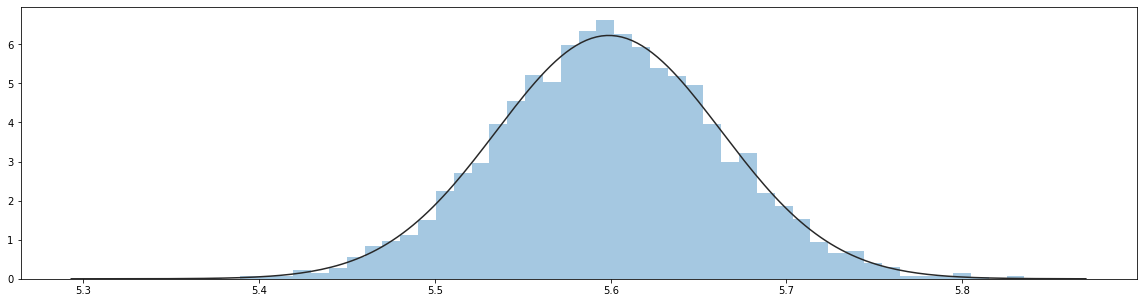

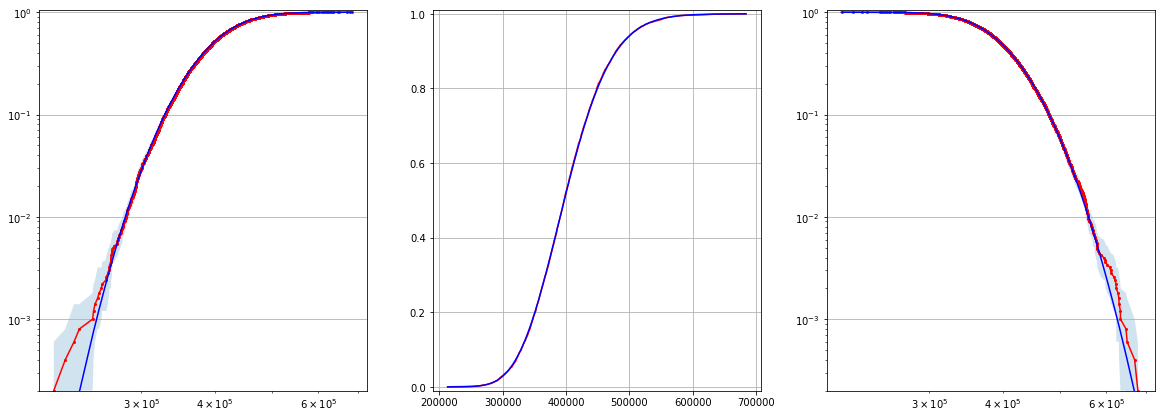



*******************************************************************************************
5 : ../../experiments/csvs_coloring/n50/three_color_gnp_50vertices_p0.092_seed17_cnfgen.csv
*******************************************************************************************
lognormal parameters: sigma 0.12582423552763924, mu 13.43224750269546, location 4.541455297398146e-06


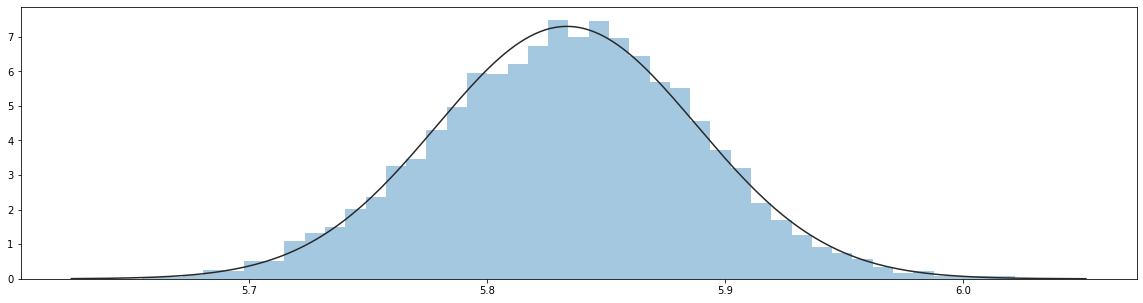

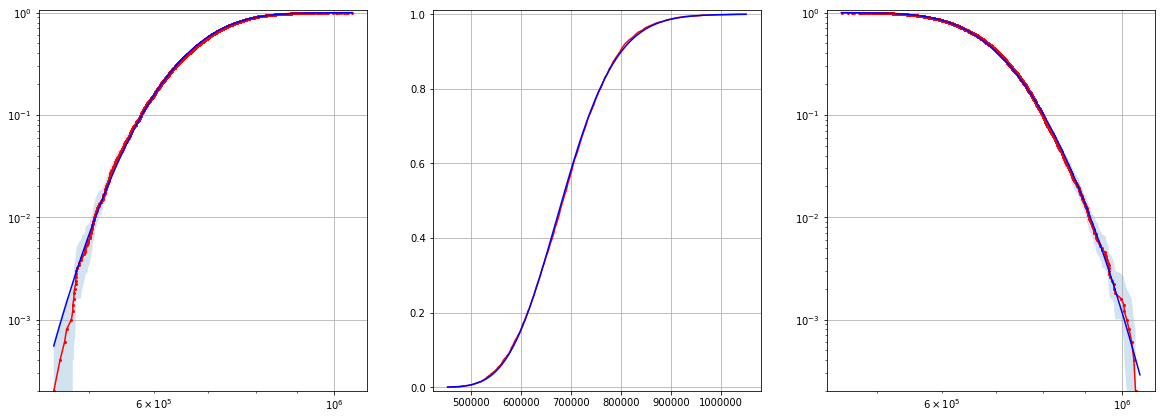



*******************************************************************************************
6 : ../../experiments/csvs_coloring/n50/three_color_gnp_50vertices_p0.092_seed65_cnfgen.csv
*******************************************************************************************
lognormal parameters: sigma 0.12413992398951049, mu 14.668065775121155, location 6.2369168639173666e-06


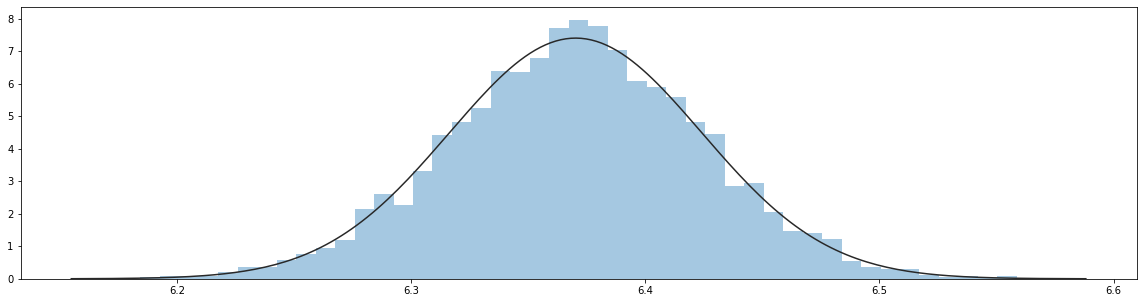

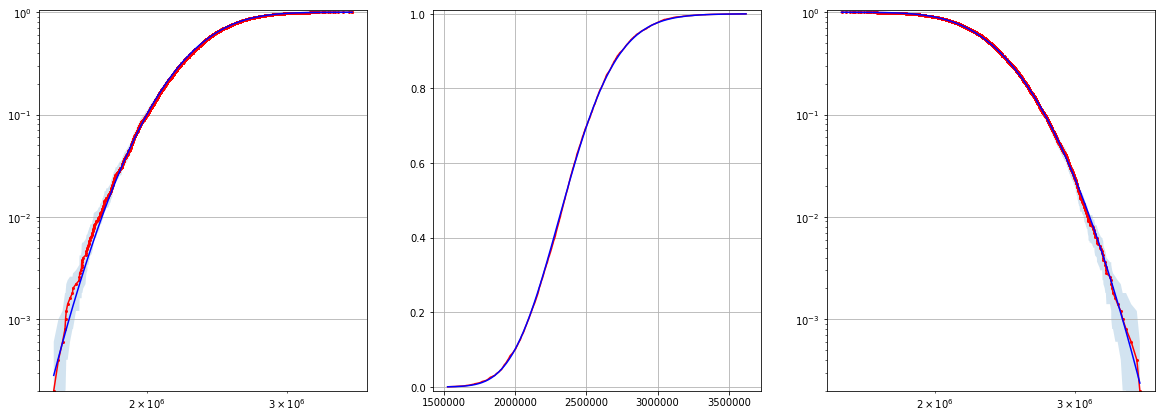



*******************************************************************************************
7 : ../../experiments/csvs_coloring/n50/three_color_gnp_50vertices_p0.092_seed34_cnfgen.csv
*******************************************************************************************
lognormal parameters: sigma 0.1257019478925887, mu 14.337184039369465, location 105622.48156027221


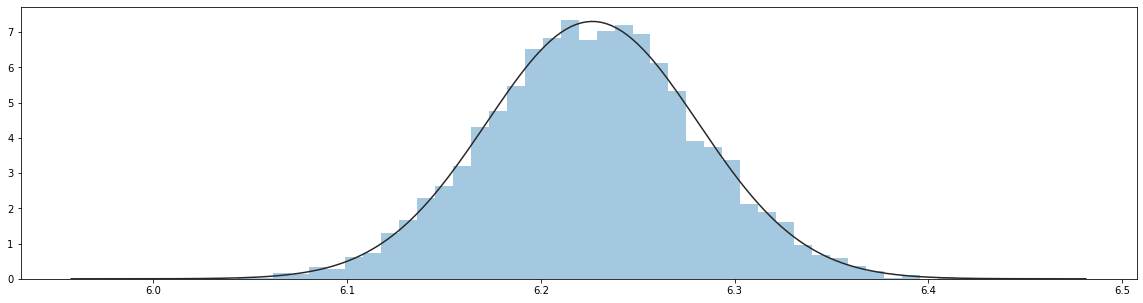

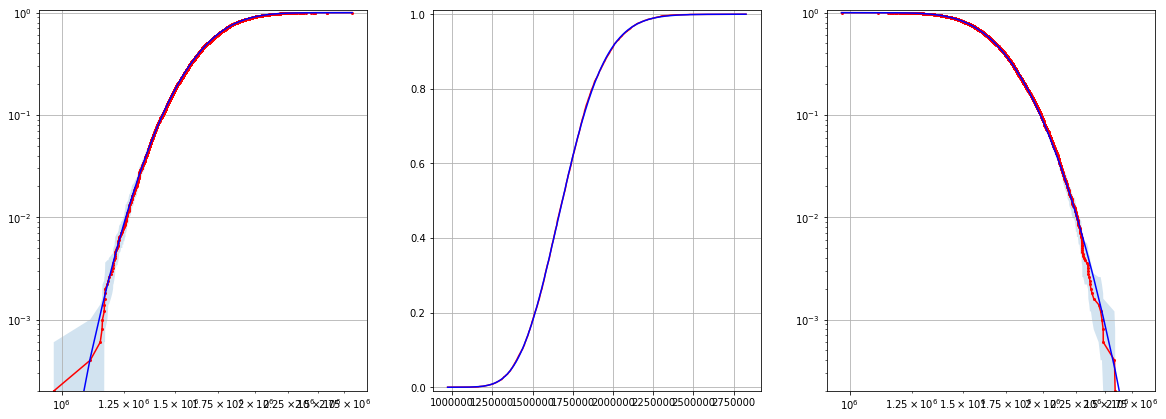



*******************************************************************************************
8 : ../../experiments/csvs_coloring/n50/three_color_gnp_50vertices_p0.092_seed11_cnfgen.csv
*******************************************************************************************
lognormal parameters: sigma 0.13140228755953634, mu 14.088311218822898, location 54601.08770402245


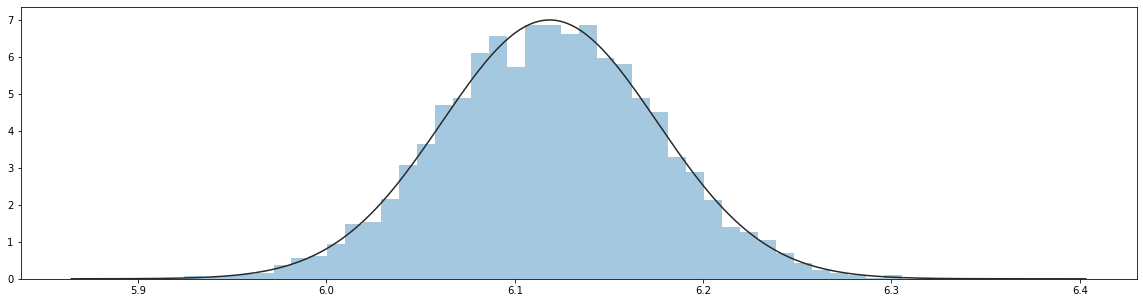

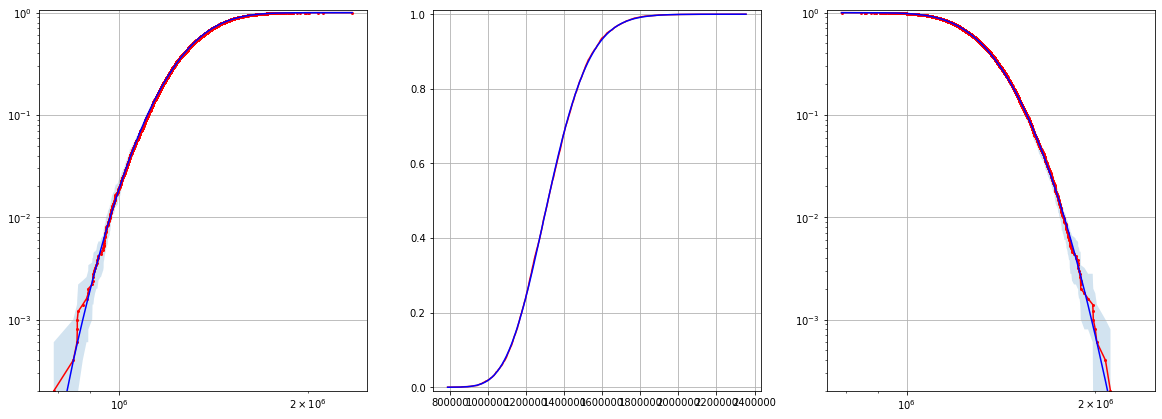



*******************************************************************************************
9 : ../../experiments/csvs_coloring/n50/three_color_gnp_50vertices_p0.092_seed70_cnfgen.csv
*******************************************************************************************
lognormal parameters: sigma 0.11174457979877539, mu 9.73848702379133, location 5.431539327559159e-06


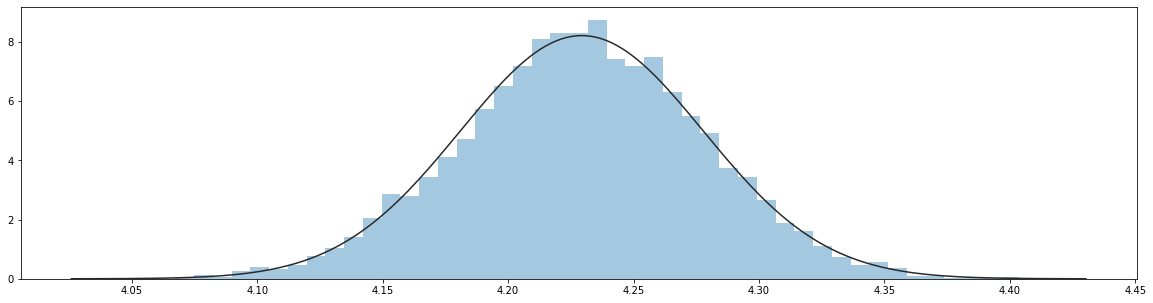

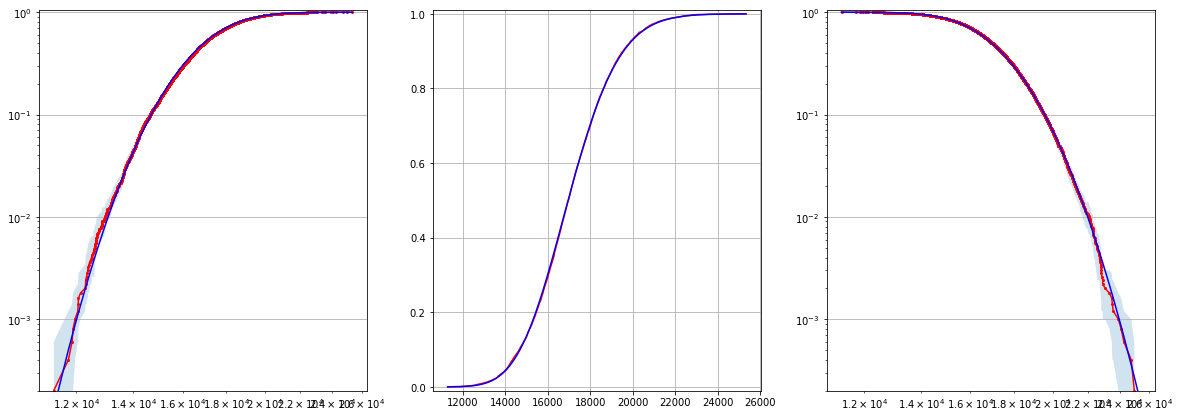



********************************************************************************************
10 : ../../experiments/csvs_coloring/n50/three_color_gnp_50vertices_p0.092_seed61_cnfgen.csv
********************************************************************************************
lognormal parameters: sigma 0.1361073353787759, mu 17.872084954609697, location 1616271.519057256


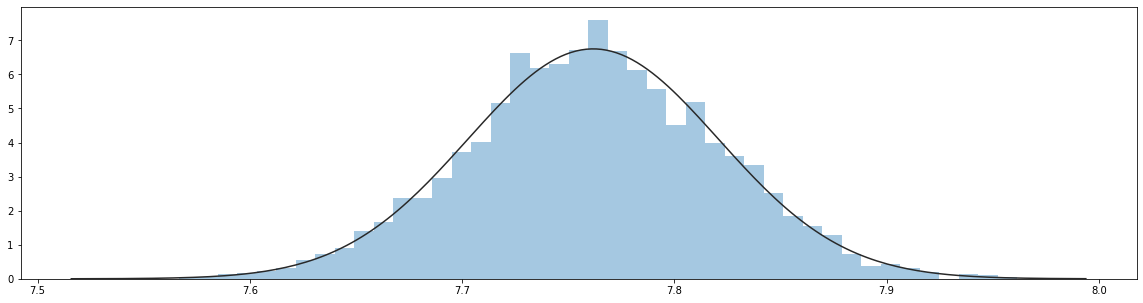

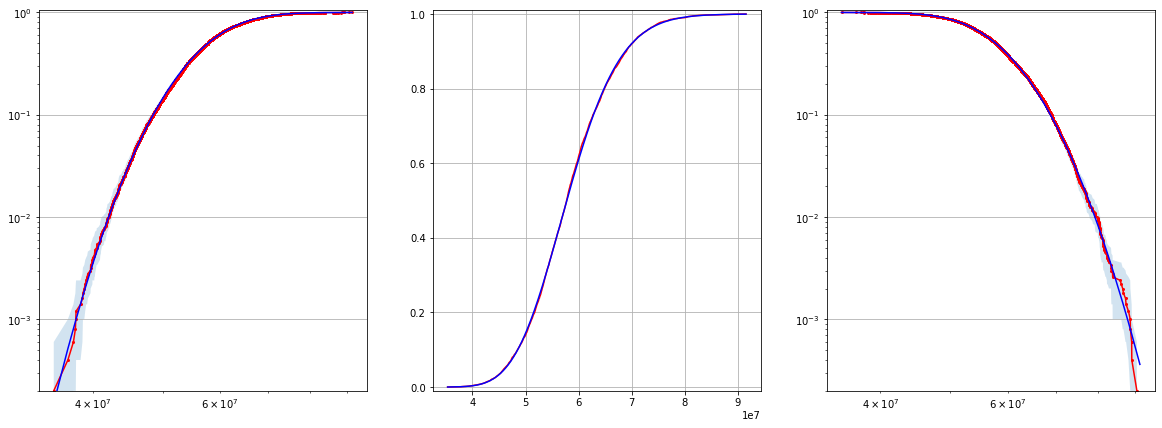



********************************************************************************************
11 : ../../experiments/csvs_coloring/n50/three_color_gnp_50vertices_p0.092_seed74_cnfgen.csv
********************************************************************************************
lognormal parameters: sigma 0.13958850068163534, mu 12.846151400886743, location 42910.01260435799


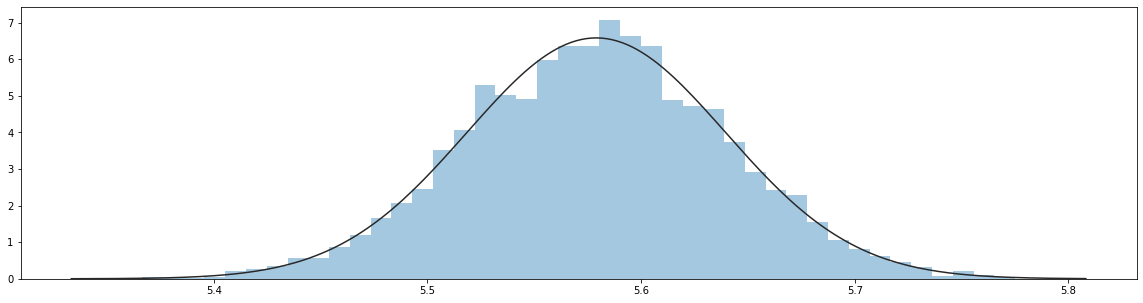

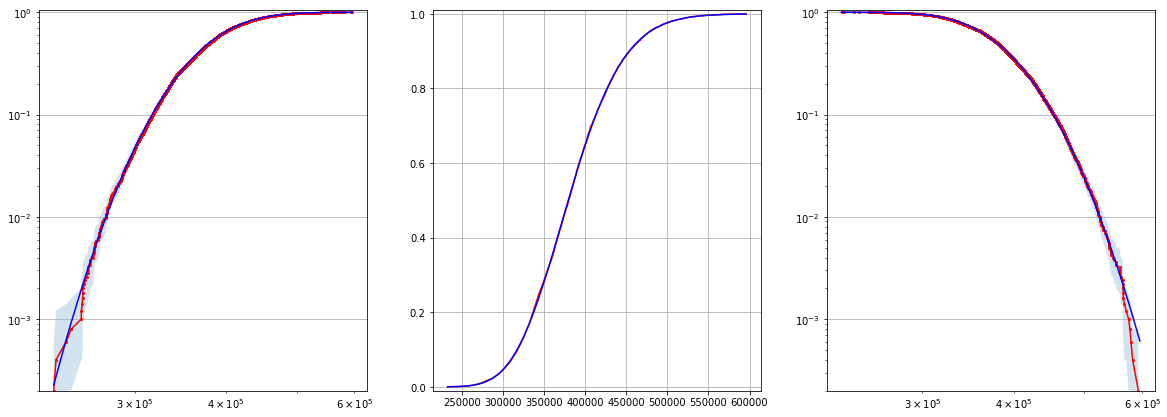



********************************************************************************************
12 : ../../experiments/csvs_coloring/n50/three_color_gnp_50vertices_p0.092_seed32_cnfgen.csv
********************************************************************************************
lognormal parameters: sigma 0.1255734388916189, mu 16.58041949590588, location 2.900984186935288e-05


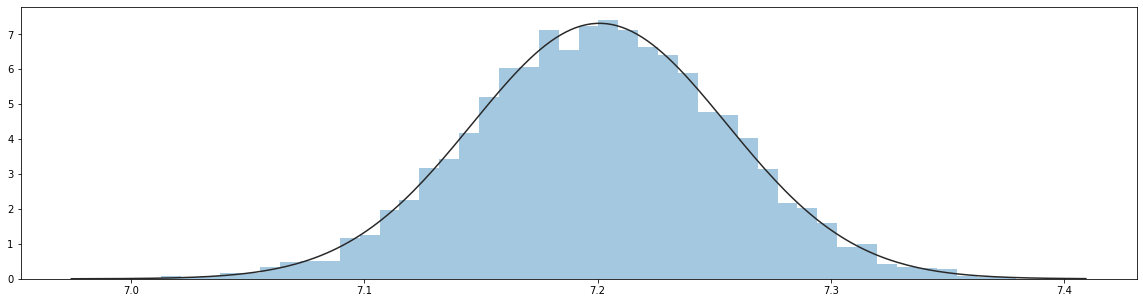

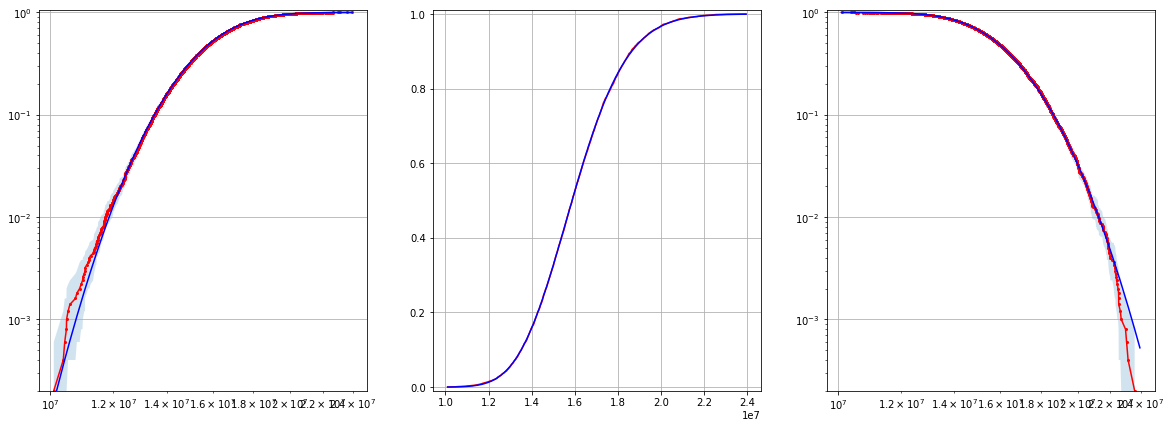



********************************************************************************************
13 : ../../experiments/csvs_coloring/n50/three_color_gnp_50vertices_p0.092_seed26_cnfgen.csv
********************************************************************************************
lognormal parameters: sigma 0.11923855701578809, mu 13.26739574261597, location 6.331145541422275e-06


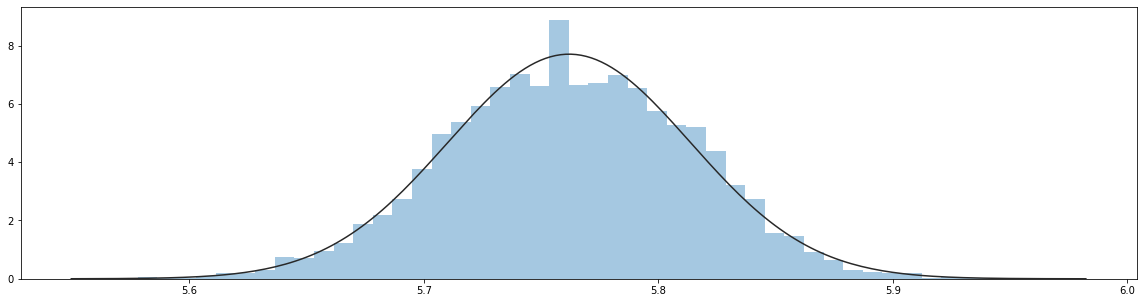

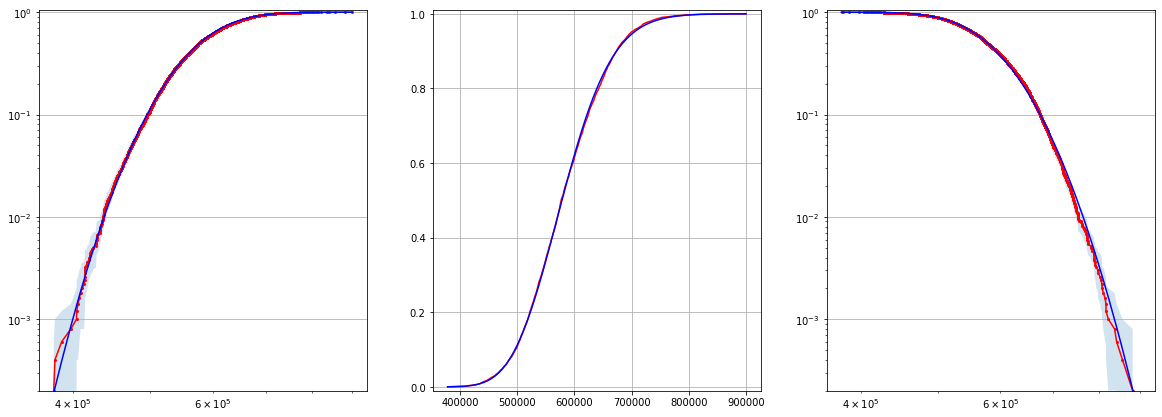



********************************************************************************************
14 : ../../experiments/csvs_coloring/n50/three_color_gnp_50vertices_p0.092_seed58_cnfgen.csv
********************************************************************************************
lognormal parameters: sigma 0.11807086464944337, mu 12.848586023595848, location 6.619048002342497e-06


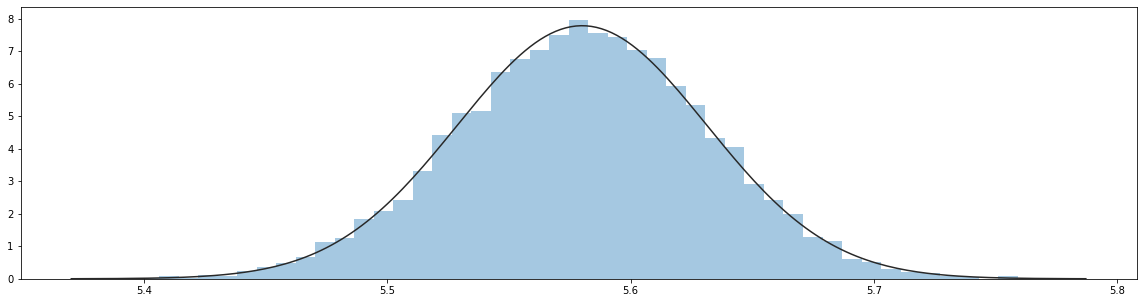

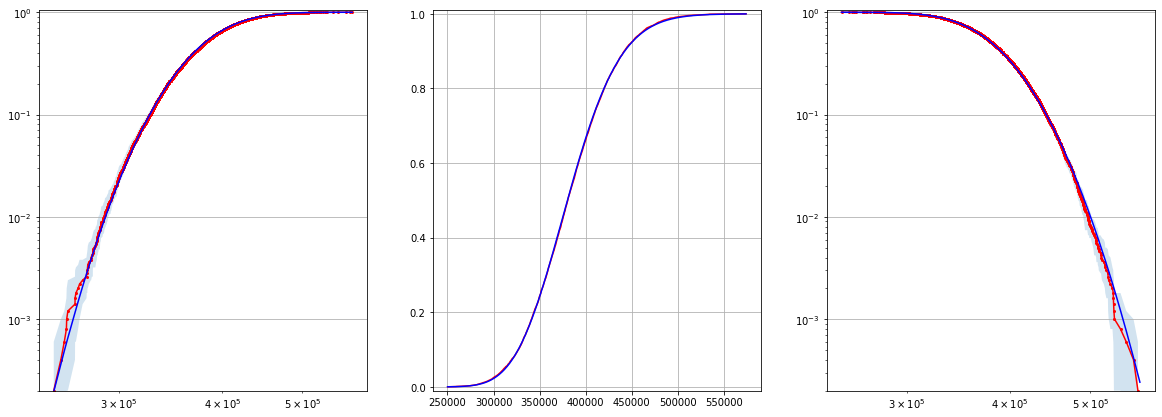



********************************************************************************************
15 : ../../experiments/csvs_coloring/n50/three_color_gnp_50vertices_p0.092_seed95_cnfgen.csv
********************************************************************************************
lognormal parameters: sigma 0.13766451689415304, mu 13.78495264479858, location 59301.31496871255


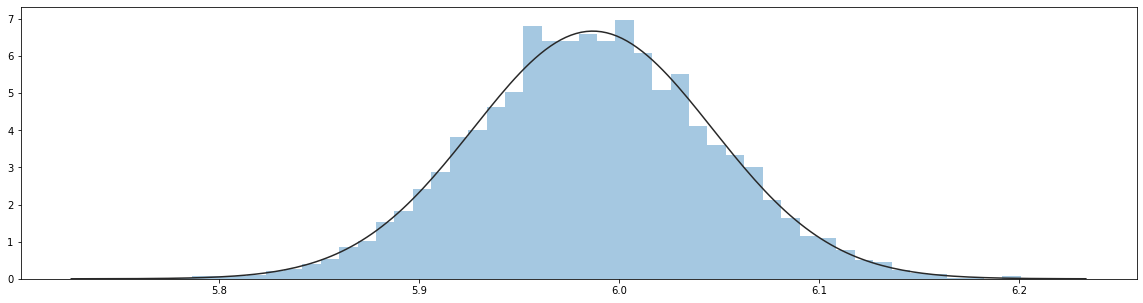

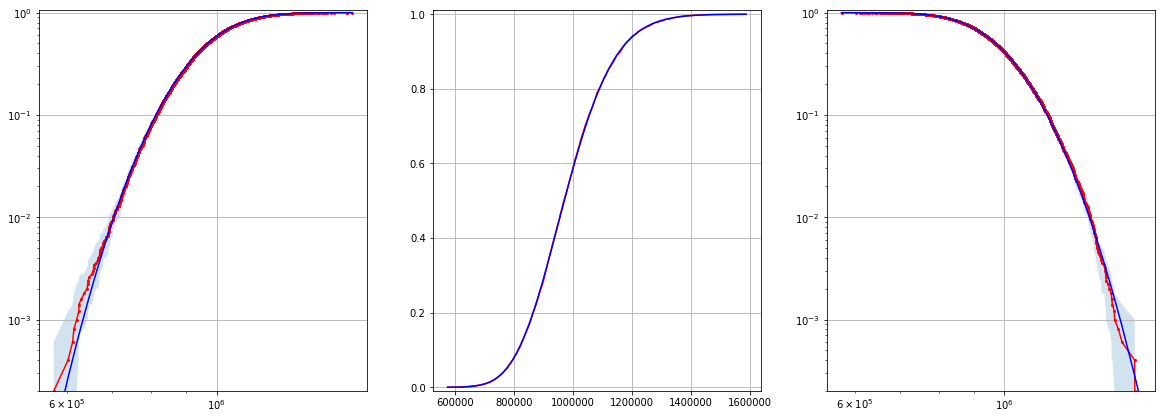



********************************************************************************************
16 : ../../experiments/csvs_coloring/n50/three_color_gnp_50vertices_p0.092_seed36_cnfgen.csv
********************************************************************************************
lognormal parameters: sigma 0.12452279259120667, mu 16.70367312462684, location 0.00014122200668181337


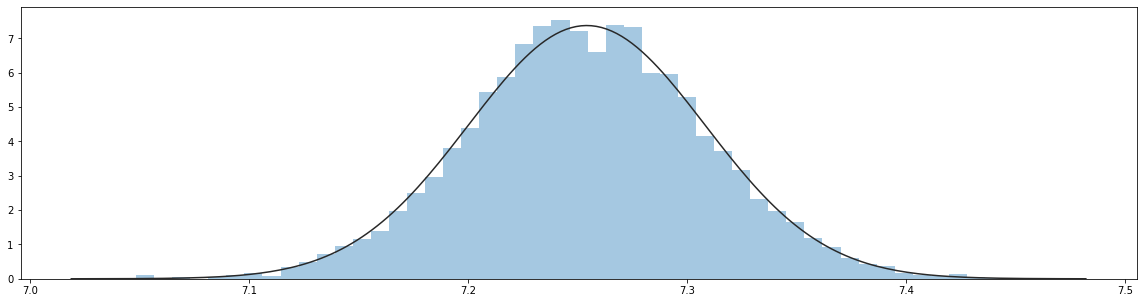

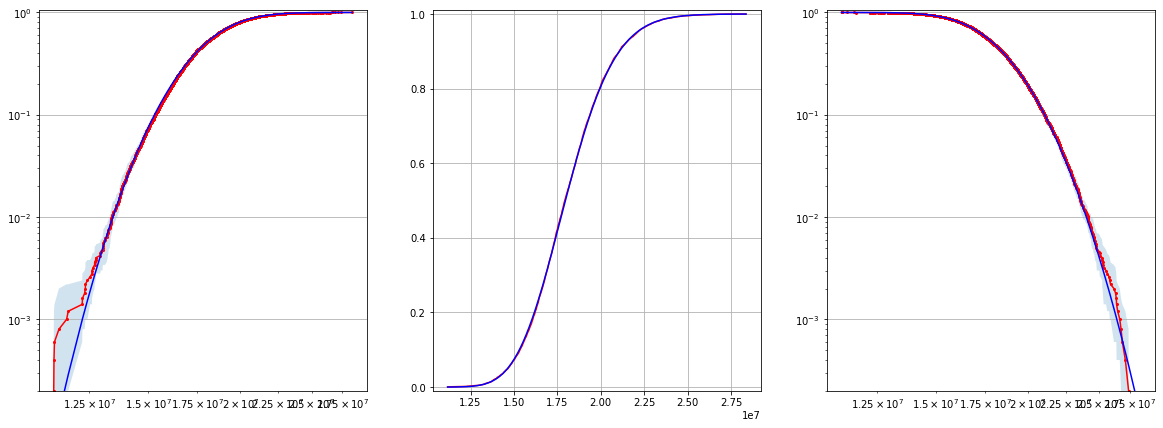



********************************************************************************************
17 : ../../experiments/csvs_coloring/n50/three_color_gnp_50vertices_p0.092_seed84_cnfgen.csv
********************************************************************************************
lognormal parameters: sigma 0.11376254822649196, mu 10.433565917592656, location 3.5967987310956658e-06


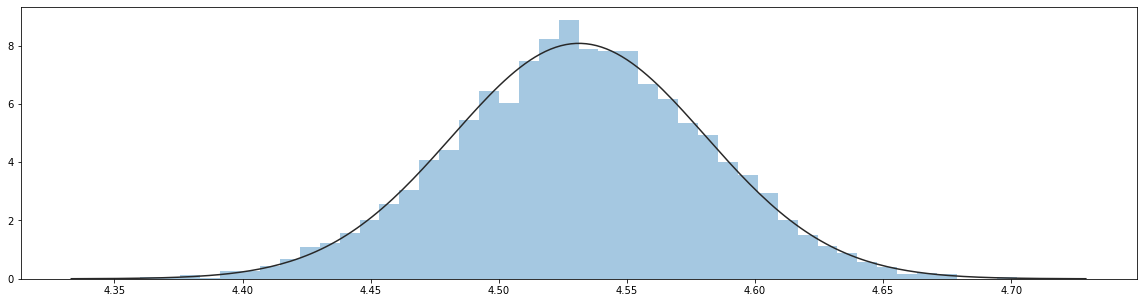

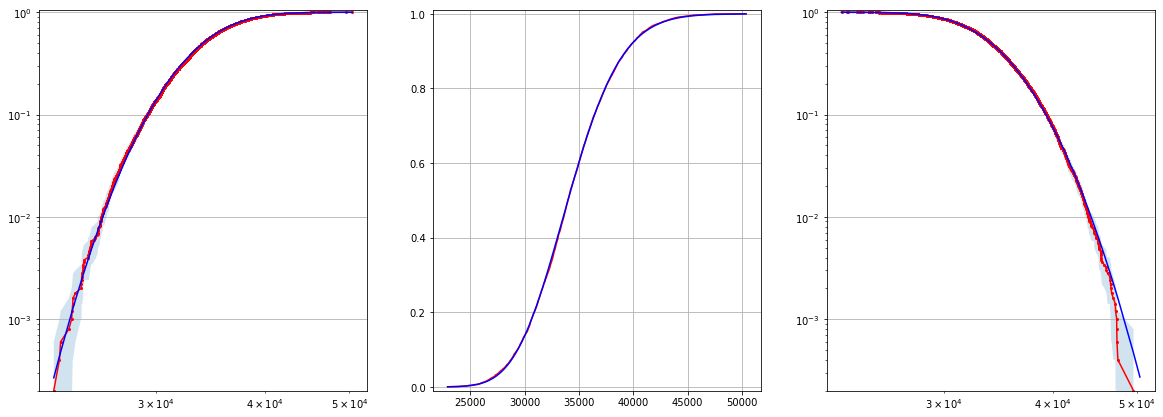



********************************************************************************************
18 : ../../experiments/csvs_coloring/n50/three_color_gnp_50vertices_p0.092_seed75_cnfgen.csv
********************************************************************************************
lognormal parameters: sigma 0.1323614209219829, mu 14.781773512780562, location 6.502074460594595e-06


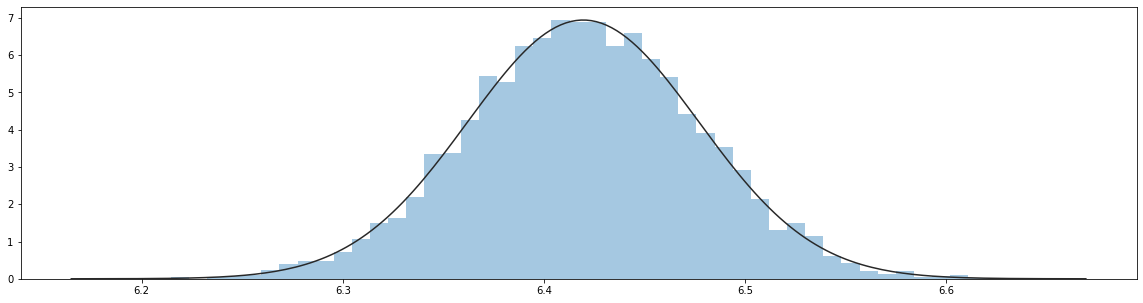

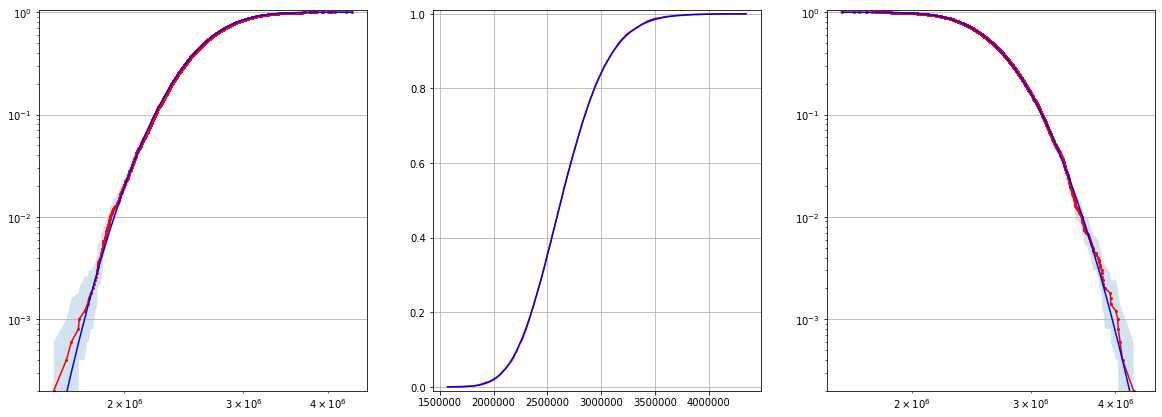



********************************************************************************************
19 : ../../experiments/csvs_coloring/n50/three_color_gnp_50vertices_p0.092_seed42_cnfgen.csv
********************************************************************************************
lognormal parameters: sigma 0.12336475976344362, mu 14.45804030006948, location 3.6550545192550813e-06


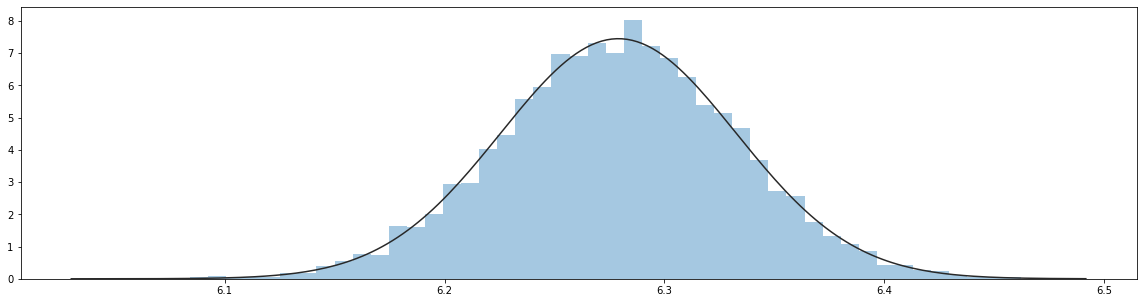

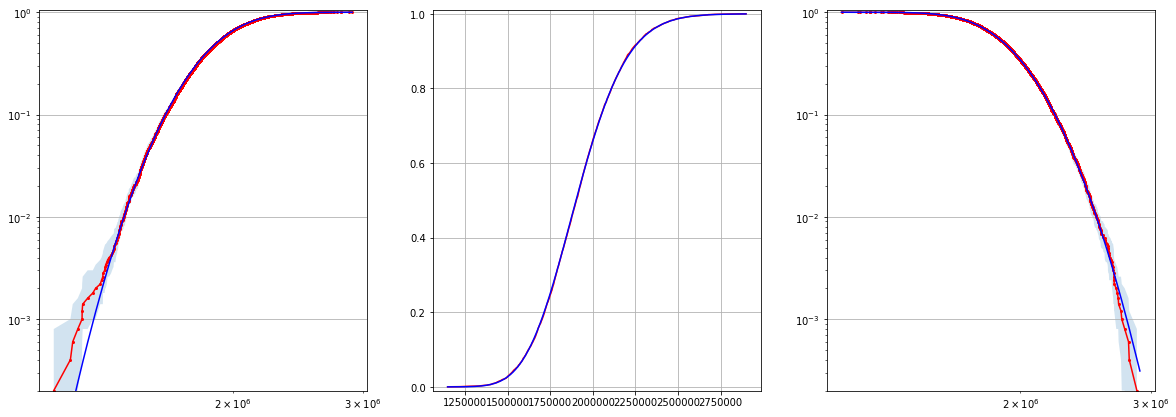



*******************************************************************************************
20 : ../../experiments/csvs_coloring/n50/three_color_gnp_50vertices_p0.092_seed4_cnfgen.csv
*******************************************************************************************
lognormal parameters: sigma 0.12319679642464007, mu 14.517036374604746, location 5.9839429969769594e-06


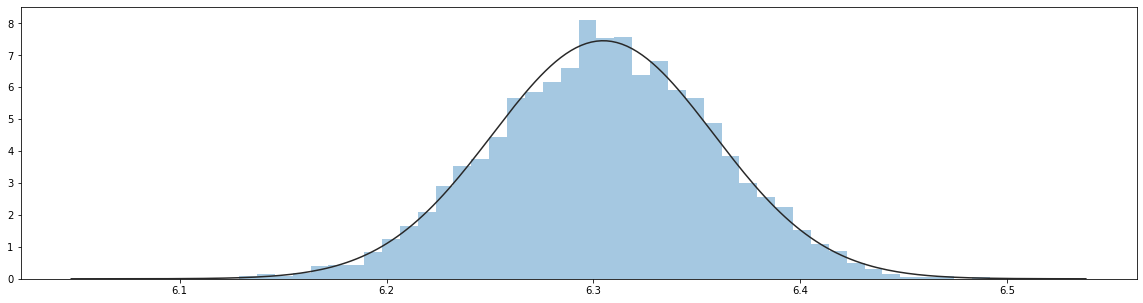

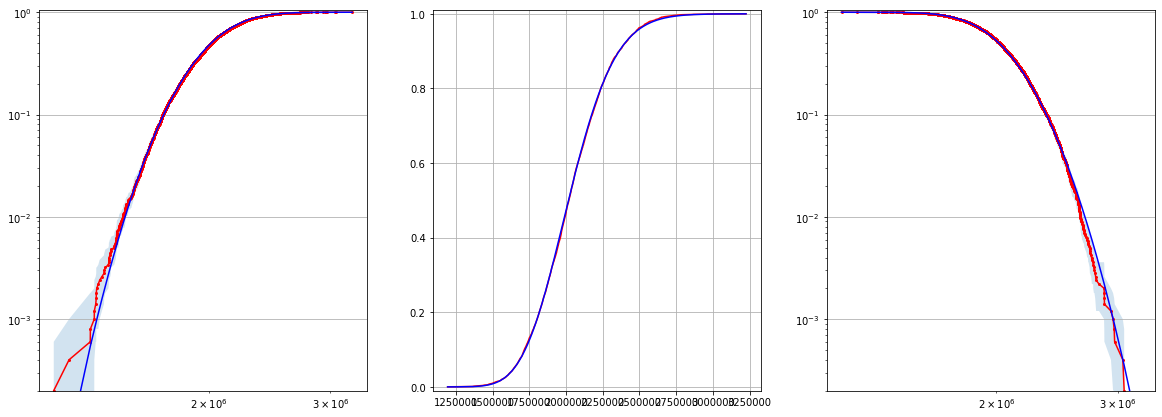



********************************************************************************************
21 : ../../experiments/csvs_coloring/n50/three_color_gnp_50vertices_p0.092_seed55_cnfgen.csv
********************************************************************************************
lognormal parameters: sigma 0.12251436638458786, mu 12.314296126576481, location 5.81903173287669e-06


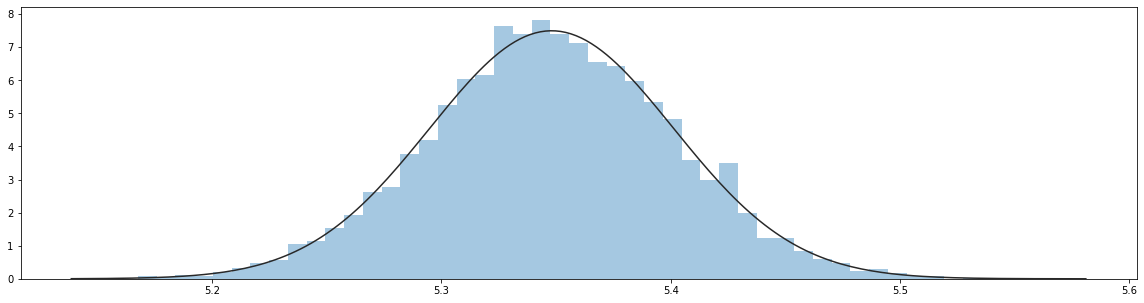

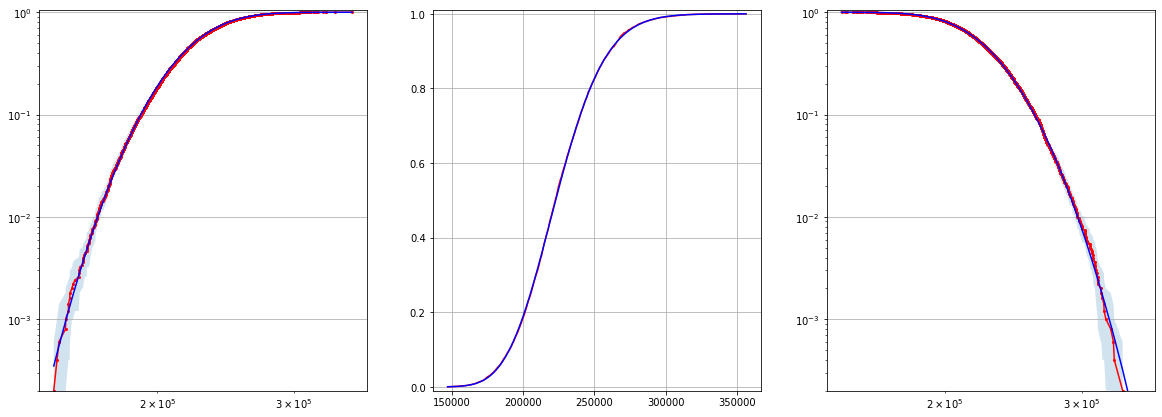



********************************************************************************************
22 : ../../experiments/csvs_coloring/n50/three_color_gnp_50vertices_p0.092_seed18_cnfgen.csv
********************************************************************************************
lognormal parameters: sigma 0.1176912853147205, mu 13.837510406501055, location 5.820075020451528e-06


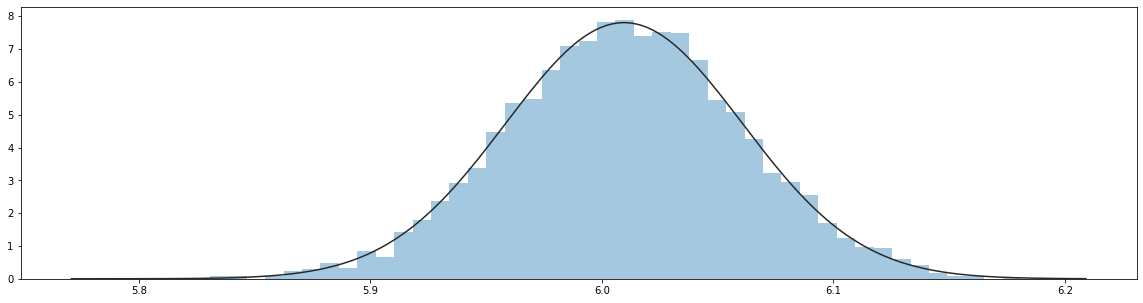

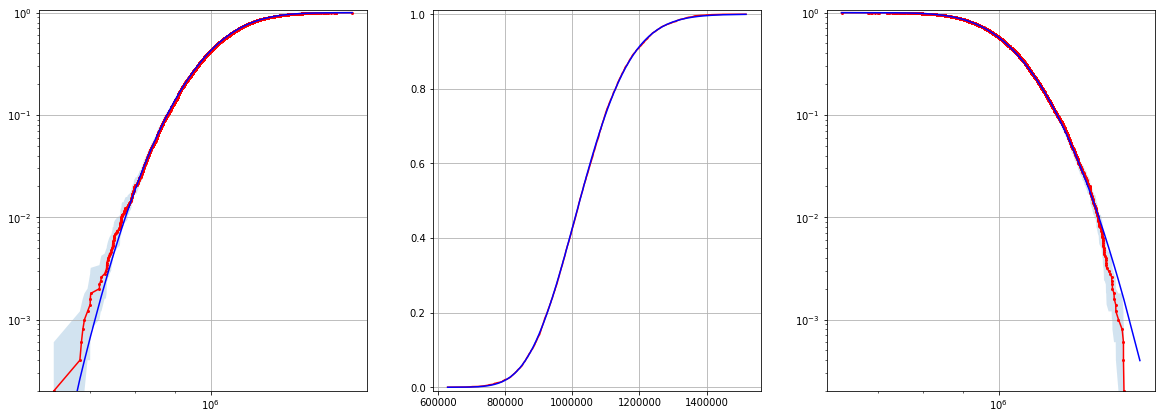



********************************************************************************************
23 : ../../experiments/csvs_coloring/n50/three_color_gnp_50vertices_p0.092_seed25_cnfgen.csv
********************************************************************************************
lognormal parameters: sigma 0.12813547976793854, mu 16.960089355631744, location 3.9717367927684426e-05


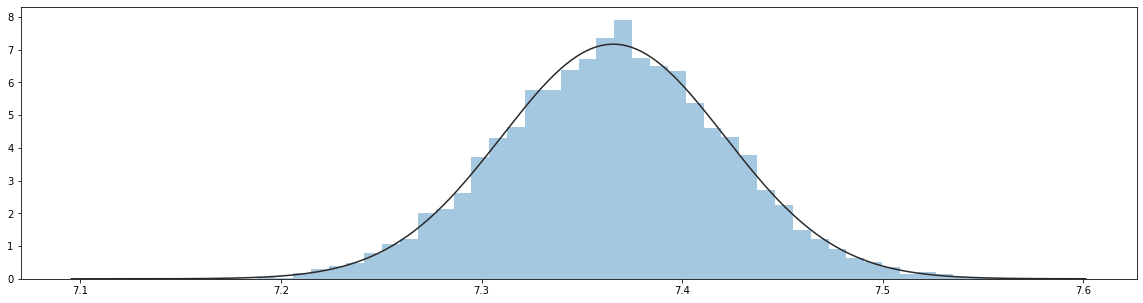

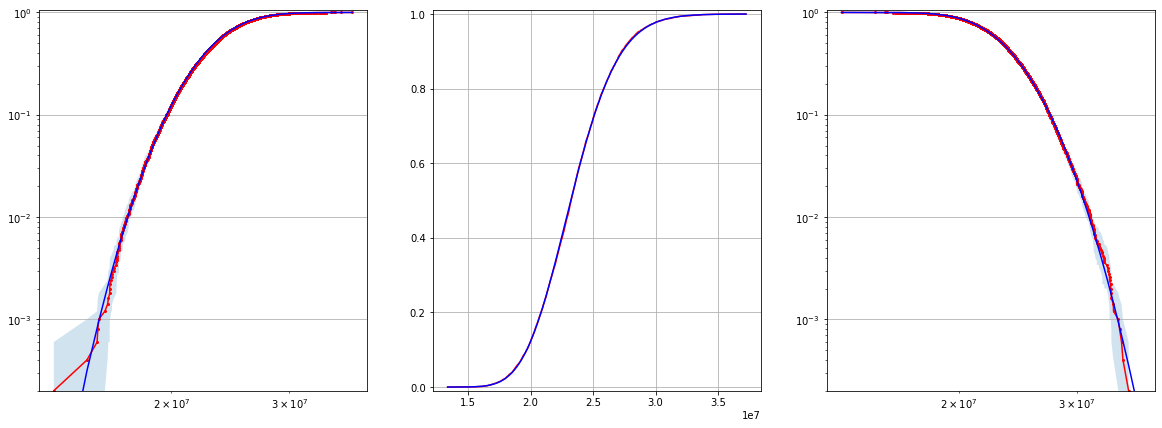



*******************************************************************************************
24 : ../../experiments/csvs_coloring/n50/three_color_gnp_50vertices_p0.092_seed6_cnfgen.csv
*******************************************************************************************
lognormal parameters: sigma 0.14658458848654812, mu 16.406186102859834, location 0.00029133938098795147


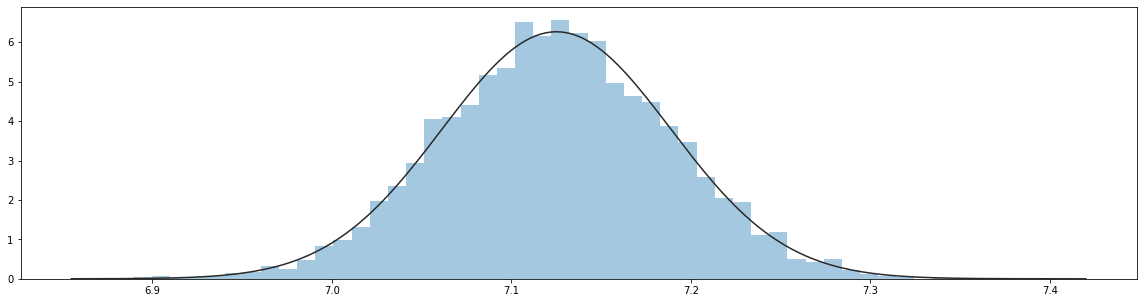

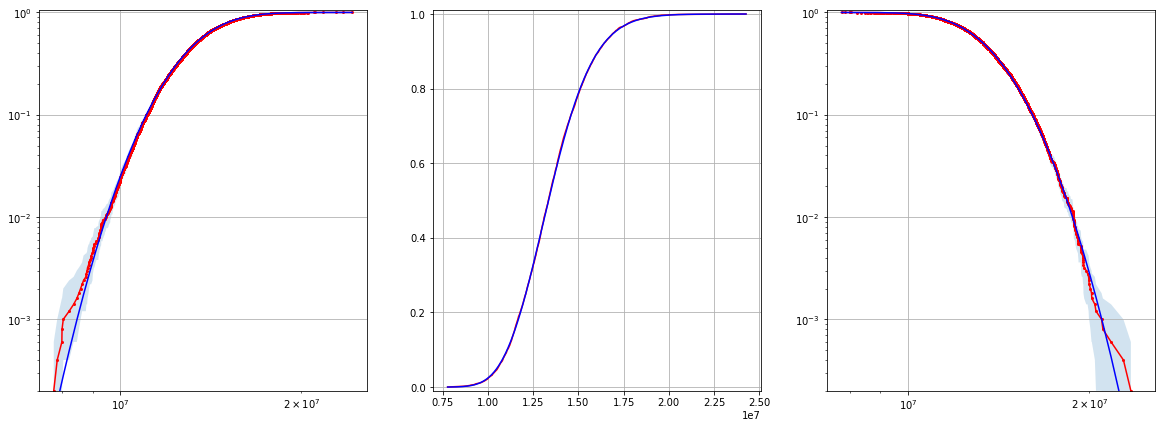



********************************************************************************************
25 : ../../experiments/csvs_coloring/n50/three_color_gnp_50vertices_p0.092_seed93_cnfgen.csv
********************************************************************************************
lognormal parameters: sigma 0.16351004802610378, mu 15.611575210193129, location 1049118.9972762933


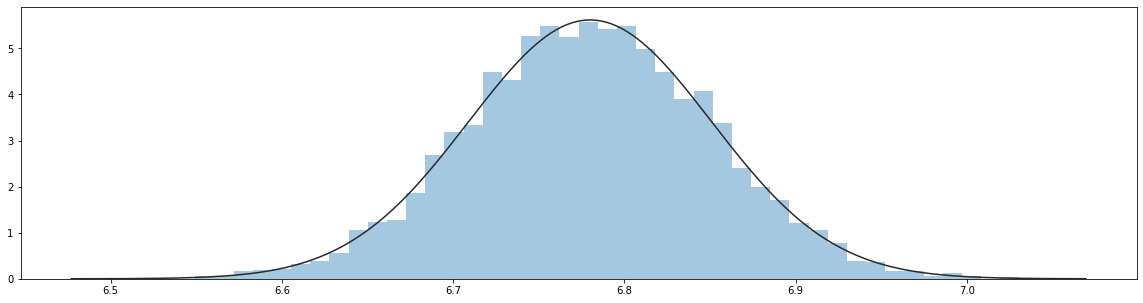

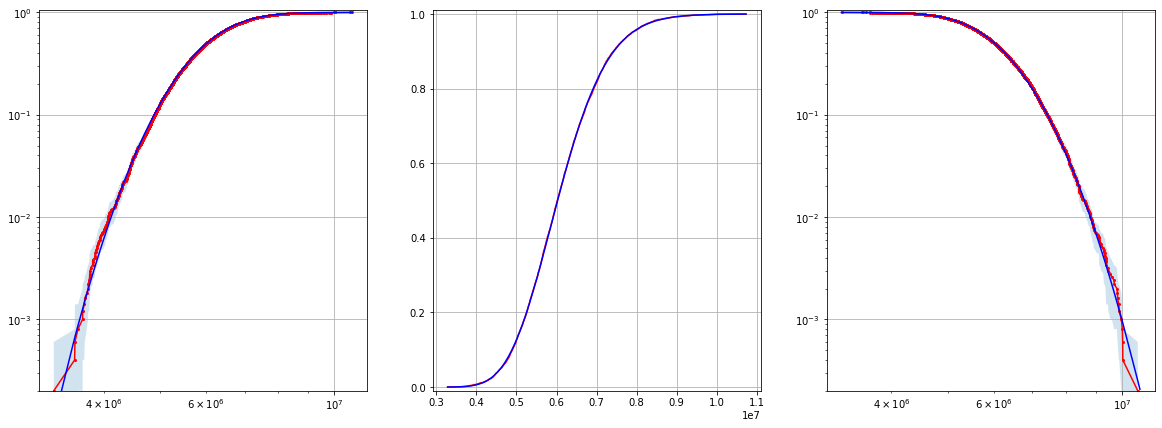



*******************************************************************************************
26 : ../../experiments/csvs_coloring/n50/three_color_gnp_50vertices_p0.092_seed1_cnfgen.csv
*******************************************************************************************
lognormal parameters: sigma 0.1235731796270674, mu 12.94155677900533, location 6.103490774111265e-06


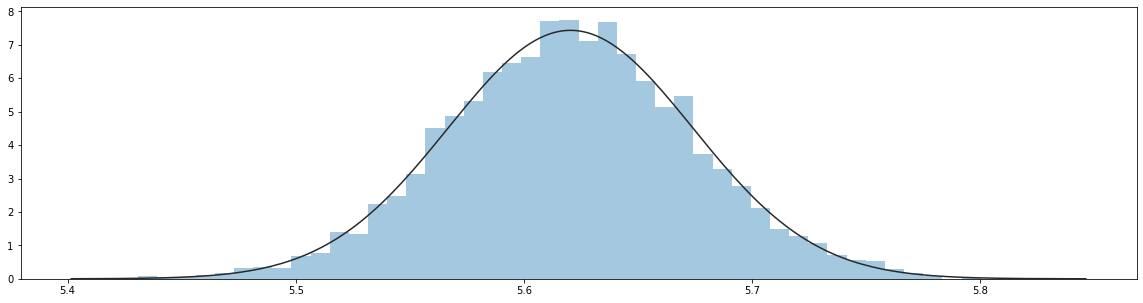

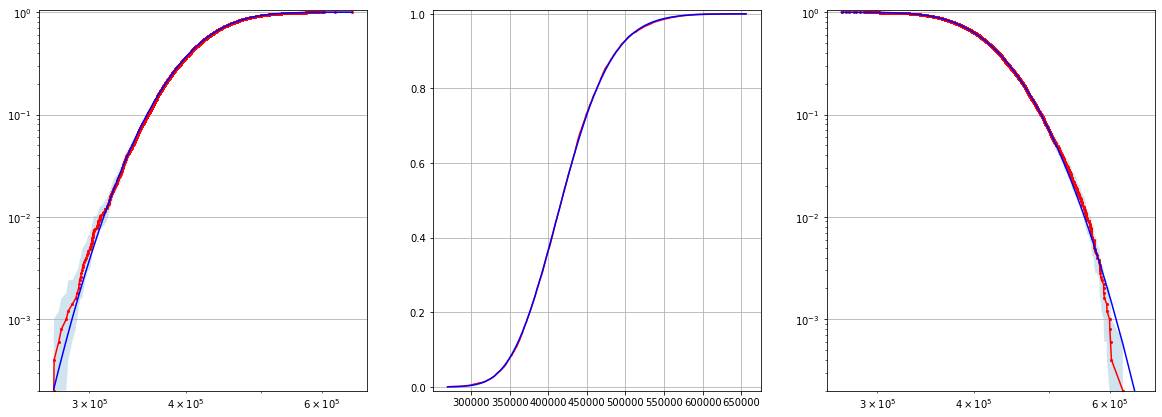



********************************************************************************************
27 : ../../experiments/csvs_coloring/n50/three_color_gnp_50vertices_p0.092_seed86_cnfgen.csv
********************************************************************************************
lognormal parameters: sigma 0.12762160689149643, mu 13.84285568087885, location 81392.04534188235


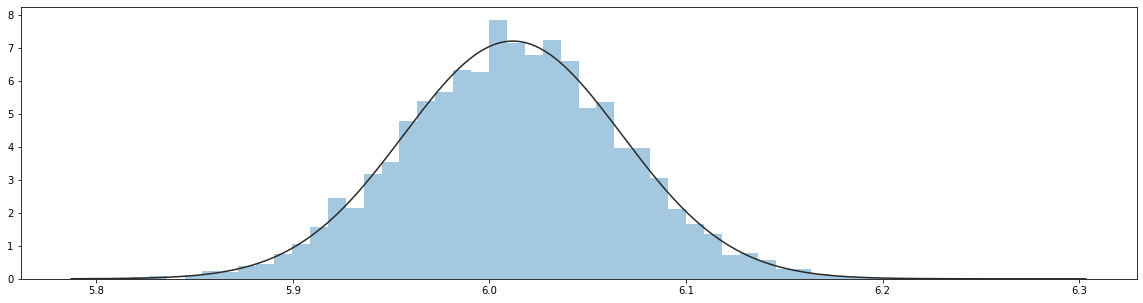

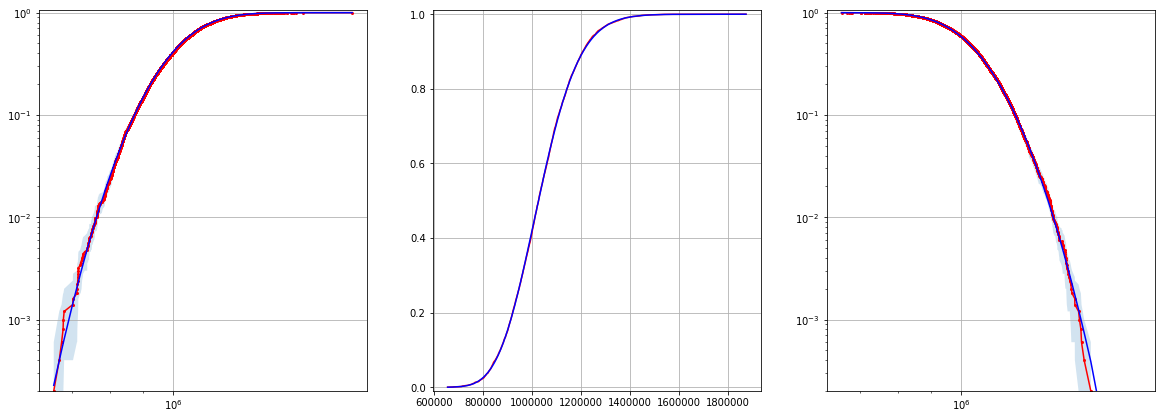



********************************************************************************************
28 : ../../experiments/csvs_coloring/n50/three_color_gnp_50vertices_p0.092_seed37_cnfgen.csv
********************************************************************************************
lognormal parameters: sigma 0.11513319113443139, mu 12.172789695006884, location 5.4276644152742234e-06


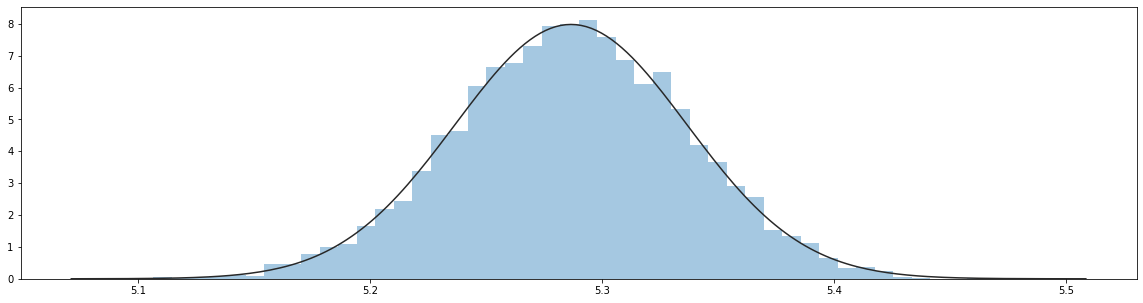

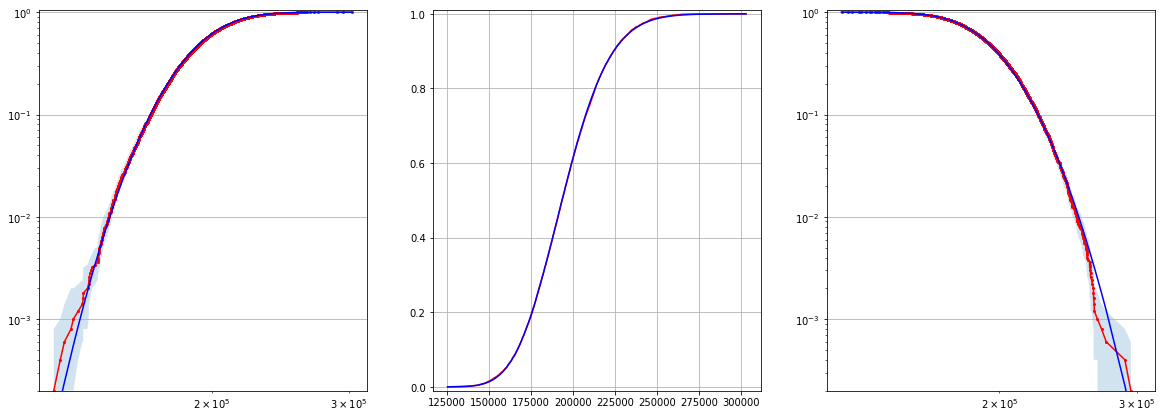



********************************************************************************************
29 : ../../experiments/csvs_coloring/n50/three_color_gnp_50vertices_p0.092_seed97_cnfgen.csv
********************************************************************************************
lognormal parameters: sigma 0.11992672628545756, mu 11.813700471338112, location 4.787271543713323e-06


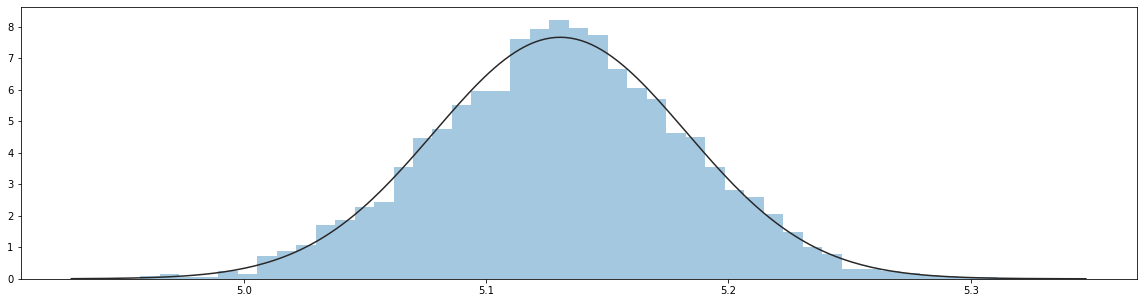

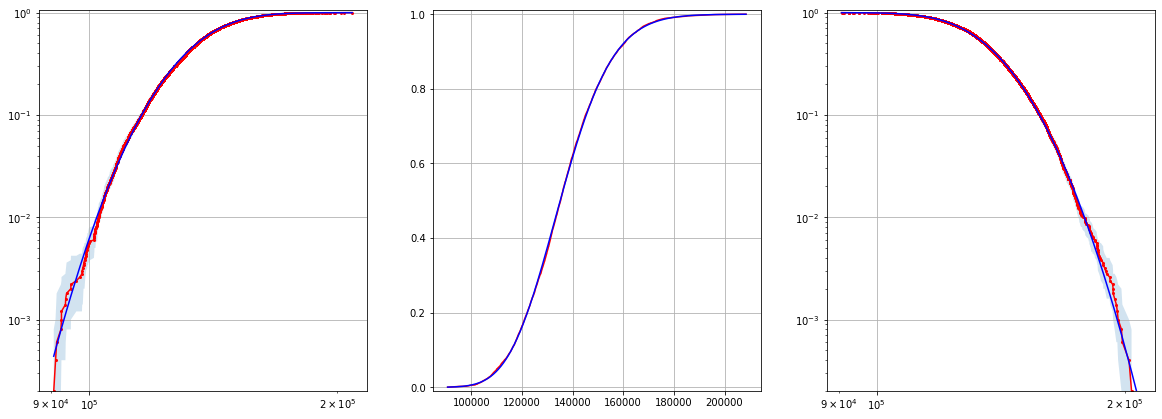



********************************************************************************************
30 : ../../experiments/csvs_coloring/n50/three_color_gnp_50vertices_p0.092_seed72_cnfgen.csv
********************************************************************************************
lognormal parameters: sigma 0.15654379225142465, mu 17.34791683272485, location 1499481.4111964642


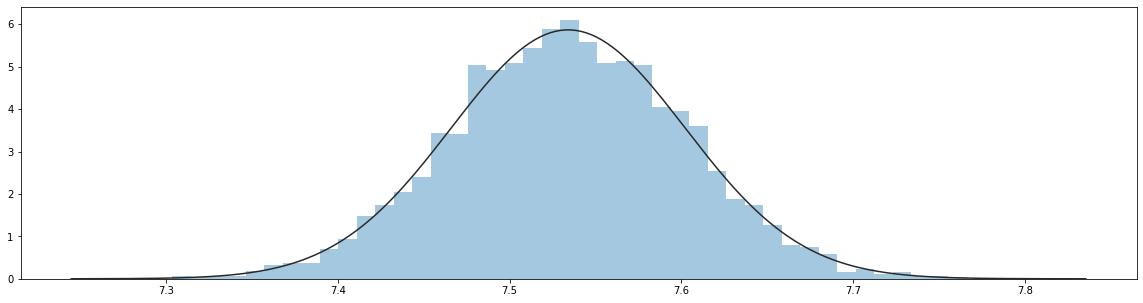

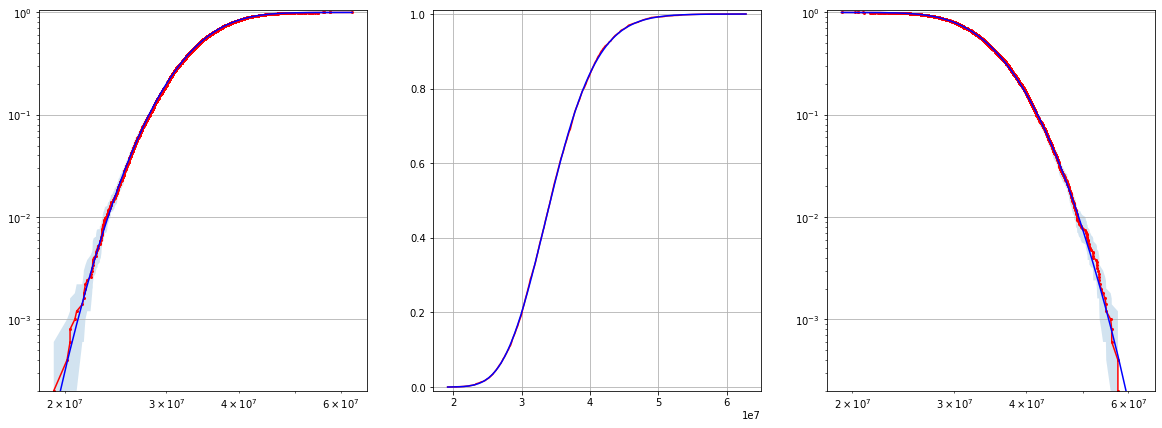



********************************************************************************************
31 : ../../experiments/csvs_coloring/n50/three_color_gnp_50vertices_p0.092_seed20_cnfgen.csv
********************************************************************************************
lognormal parameters: sigma 0.12773667783695192, mu 13.740251814611756, location 3.7357864793610707e-06


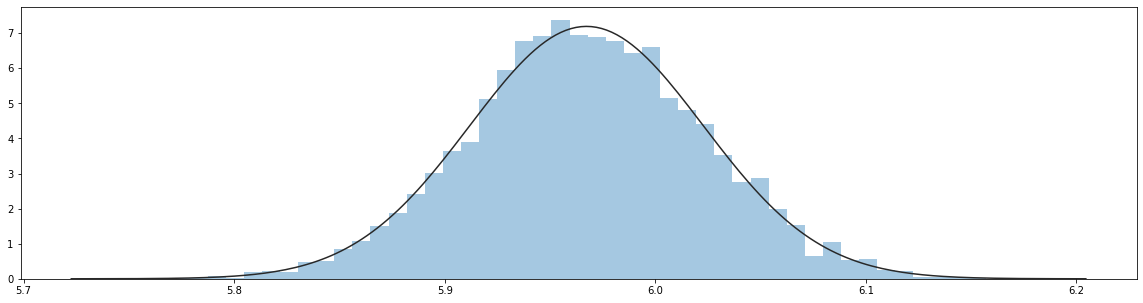

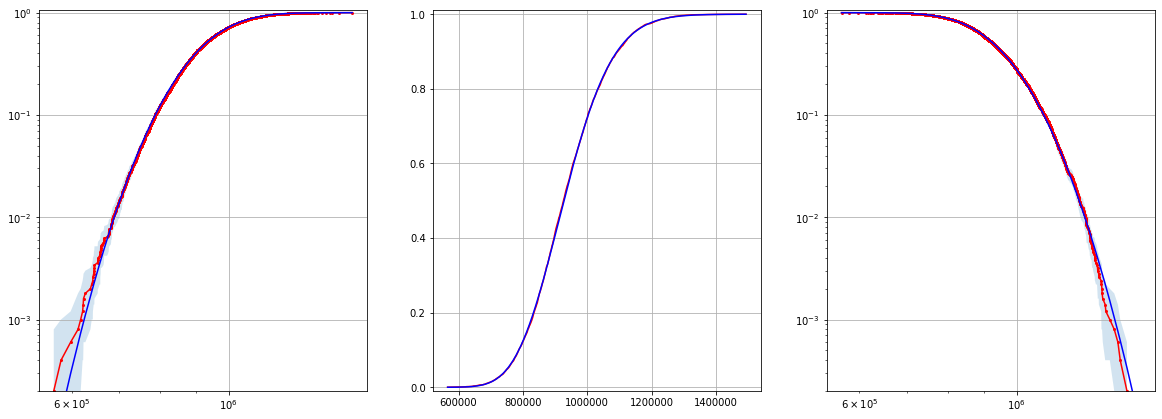

In [9]:
# Select the number of instances to interate over...
N = len(instances)

# ... and iterate over all instances to generate the plots.
for index in range(N):
    # Selection of a concrete instance and name printing
    name = instances[index]
    
    print("*" * (len(name) + len(str(index)) + 3))
    print(index, ":", name)
    print("*" * (len(name) + len(str(index)) + 3))   

    #
    # Manipulate the corresponding data frame:
    # We are only interested in the flip-values, not in the runtime, or seed used.
    #
    df = pd.read_csv(name, index_col=[0,1])
    df.drop(index=['seed', 'runtime'], level=1, inplace=True)

    # Checks if any values are nan.
    if df.isnull().values.any():
        print("There is a nan-value. This was not supposed to happen.")
        
    # Next, we are going to calculate $\mathsf{mean}_{S} (F^{(i)})$,
    # i.e., the number of flips required to solve instance $F^{(i)}$ with solver $S$.
    # This then is the hardness distribution we are going to analyze.    
    means = df.mean(axis=1)
    means = np.sort(means)  
        
    #
    # Print the plots with location parameter
    #    
    
    # Scipy can be used to fit a location parameter. 
    # In practise, however, this does not work properly.
    # Thus, we use our own method `minimize_nnlf` 
    # that can be found in the `empirical` package.
    # This method must be provided with the data object `means`, 
    # a lower bound for the location parameter, here `0.0`,
    # and an upper bound for the location parameter, # here `means[0]-0.0001`.
    # This method then yields a location parameter maximizing the likelihood.
    m = minimize_nnlf(means, 0.0, means[0]-0.0001)
    means = means - m 

    plt.figure(figsize=(20,5))
    sns.distplot(np.log10(means), fit=stats.norm, kde=False)

    # Next, we fit a two-parametric lognormal distribution 
    # (with forced location parameter zero). Note that means = means - m. 
    # Note that fitting a two-parametric lognormal distribution to 
    # original_data - m is the same as fitting 
    # a three-parametric lognormal distribution to the original_data.
    # Afterwards, we can use our own location parameter.
    s, loc, scale = lognorm.fit(means, floc=0)
    print(f"lognormal parameters: sigma {s}, mu {np.log(scale)}, location {m}")
    rv = lognorm(s, loc, scale)
    rv_all = lognorm(s, m, scale)
    
    plot_and_compare_cdf(means, rv, plot_confidence=True)
    
    plt.show(block=False)
    
    print("\n")

## Statistical Tests

As described in the paper, we use the chi squared test to check the goodness-of-fit.

We print the obtained p-values for each base instance.

(The p-values obtained by the original $\chi^2$-test and the bootstrapping-test were calculated seperately and can be found in `./evaluation/evaluate_logn/all.csv` for all solver and instance combinations. The reason for this is that it takes several hours to compute these values because of the bootstrapping.)

In [10]:
# Use the instance list as a selector for the correct rows in the `all.csv` file.
selector = [path.split('../../experiments/')[1] for path in instances]

In [13]:
# Extract the relevant rows from the data frame.
file = '../evaluate_logn/all.csv'
df = pd.read_csv(file, index_col=False)
df = df[df['instance'].isin(selector)]

# Sort the entries to match the order of the diagrams above.
df['instance'] = pd.Categorical(
    df['instance'], 
    categories=selector, 
    ordered=True
)
df.sort_values('instance', inplace=True)

# Show the instance name without path
df['instance'] = df['instance'].map(lambda name: name.split("/")[-1].split(".csv")[0])

# Mark entries where p_orig < 0.05
stars = np.where(df['p_orig']<0.05, '*', ' ')
df.loc[:, 'p_orig < 0.05'] = stars.tolist()

# Mark entries where p_new < 0.05
stars = np.where(df['p_new']<0.05, '*', ' ')
df.loc[:, 'p_new < 0.05'] = stars.tolist()

# Add the index we used
index = list(range(len(instances)))
df['index'] = index

# Change order of columns s.th. index is the first one
cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
df = df[cols]

df

,index,type,instance,p_orig,p_new,p_orig < 0.05,p_new < 0.05
128,0,SRWA,three_color_gnp_50vertices_p0.092_seed50_cnfgen,0.430201,0.480,,
98,1,SRWA,three_color_gnp_50vertices_p0.092_seed23_cnfgen,0.713487,0.780,,
124,2,SRWA,three_color_gnp_50vertices_p0.092_seed69_cnfgen,0.423208,0.460,,
119,3,SRWA,three_color_gnp_50vertices_p0.092_seed5_cnfgen,0.193671,0.150,,
117,4,SRWA,three_color_gnp_50vertices_p0.092_seed89_cnfgen,0.830983,0.910,,
121,5,SRWA,three_color_gnp_50vertices_p0.092_seed17_cnfgen,0.624872,0.680,,
105,6,SRWA,three_color_gnp_50vertices_p0.092_seed65_cnfgen,0.725779,0.710,,
106,7,SRWA,three_color_gnp_50vertices_p0.092_seed34_cnfgen,0.911165,0.940,,
123,8,SRWA,three_color_gnp_50vertices_p0.092_seed11_cnfgen,0.987071,0.970,,
118,9,SRWA,three_color_gnp_50vertices_p0.092_seed70_cnfgen,0.809241,0.770,,


## Additional statistics

Calculate the average of means and the standard deviation of the means for each base instance.

In [12]:
# This table takes a few seconds to generate.

datarows = []

for index in range(len(instances)):
    name = instances[index]
    df_for_instance = pd.read_csv(name, index_col=[0,1])
    df_for_instance.drop(index=['seed', 'runtime'], level=1, inplace=True)
    means_for_instance = df_for_instance.mean(axis=1)
    name = name.split("/")[-1]
    name = name.split(".csv")[0]
    mean = round(means_for_instance.mean(), 1)
    std_of_means = round(means_for_instance.std(), 1)
    #print(f"{name}: average of means {means.mean()}; std of means {means.std()}")
    
    datarows.append([name, mean, std_of_means])
    
df3 = pd.DataFrame(np.array([row for row in datarows]),
                   columns=['instance', 'average of means', 'std dev of means'])
df3

,instance,average of means,std dev of means
0,three_color_gnp_50vertices_p0.092_seed50_cnfgen,1604944.9,195952.8
1,three_color_gnp_50vertices_p0.092_seed23_cnfgen,3325132.7,452805.7
2,three_color_gnp_50vertices_p0.092_seed69_cnfgen,12831795.1,1843748.3
3,three_color_gnp_50vertices_p0.092_seed5_cnfgen,14608919.6,2184647.5
4,three_color_gnp_50vertices_p0.092_seed89_cnfgen,451154.9,59648.6
5,three_color_gnp_50vertices_p0.092_seed17_cnfgen,687041.4,86564.4
6,three_color_gnp_50vertices_p0.092_seed65_cnfgen,2363749.5,293974.4
7,three_color_gnp_50vertices_p0.092_seed34_cnfgen,1803830.9,214323.8
8,three_color_gnp_50vertices_p0.092_seed11_cnfgen,1379631.2,174951.4
9,three_color_gnp_50vertices_p0.092_seed70_cnfgen,17063.9,1908.0
